In [1]:
import sys

In [2]:
sys.path.insert(0,'../..')

In [4]:
from numerical_integrators.singlestep import rk4

In [5]:
import numpy as np

In [272]:
def velfield(t,x):
    vel = np.empty(x.shape)
    r = np.linalg.norm(x,axis=0)
    #print(np.mean(r))
    #print(np.amax(r))
    #print(np.amin(r))
    vel[0] = x[0]*np.sin(np.pi*(r-1))
    vel[1] = x[1]*np.sin(np.pi*(r-1))
    vel[2] = x[2]*np.sin(np.pi*(r-1))
    return vel

In [346]:
rhos_init = np.asarray([1.1,1.2,1.3])-1*0.2

phi = np.linspace(0,2*np.pi,30)
theta = np.linspace(0,np.pi,30)

In [347]:
rhos_init

array([0.9, 1. , 1.1])

In [371]:
r_init = np.empty((3,3,30,30))

In [372]:
for j, rho_init in enumerate(rhos_init):
    r_init[j,0] = rho_init * np.cos(np.meshgrid(phi,theta,indexing='ij')[0])*np.sin(np.meshgrid(phi,theta,indexing='ij')[1])
    r_init[j,1] = rho_init * np.sin(np.meshgrid(phi,theta,indexing='ij')[0])*np.sin(np.meshgrid(phi,theta,indexing='ij')[1])
    r_init[j,2] = rho_init * np.cos(np.meshgrid(phi,theta,indexing='ij')[1])

In [373]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

<IPython.core.display.Javascript object>


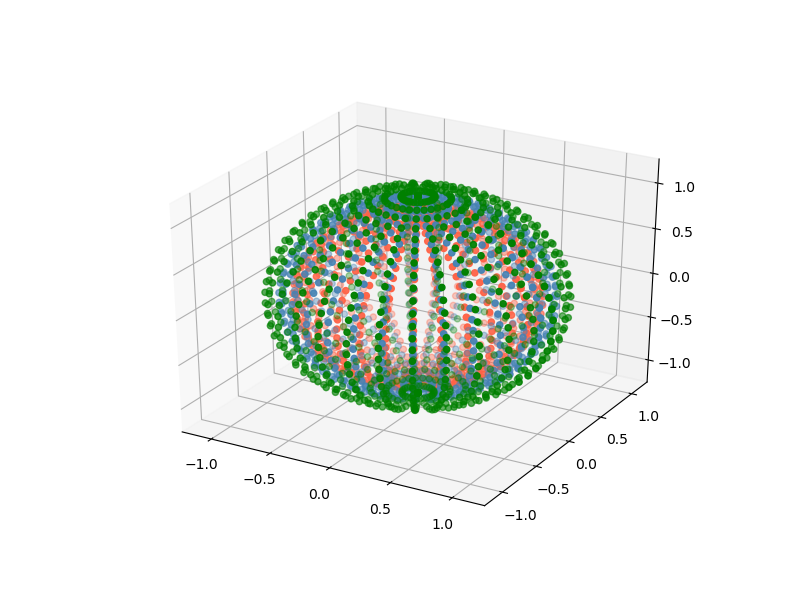

In [374]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')

cs = ['tomato','steelblue','green']

for j in range(3):
    ax.scatter(r_init[j,0],r_init[j,1],r_init[j,2], c= cs[j])

In [352]:
import copy

In [375]:
t0 = 0
tf = 0.5
h = 0.1

r_fin = copy.deepcopy(r_init)

for i in range(3):
    t = t0
    for j in range(int(np.ceil((tf-t0)/h))):
    #pass
        t,r_fin[i],h = rk4(t,r_fin[i],h,velfield)

In [376]:
r_fin[0,0].shape

(30, 30)

<IPython.core.display.Javascript object>


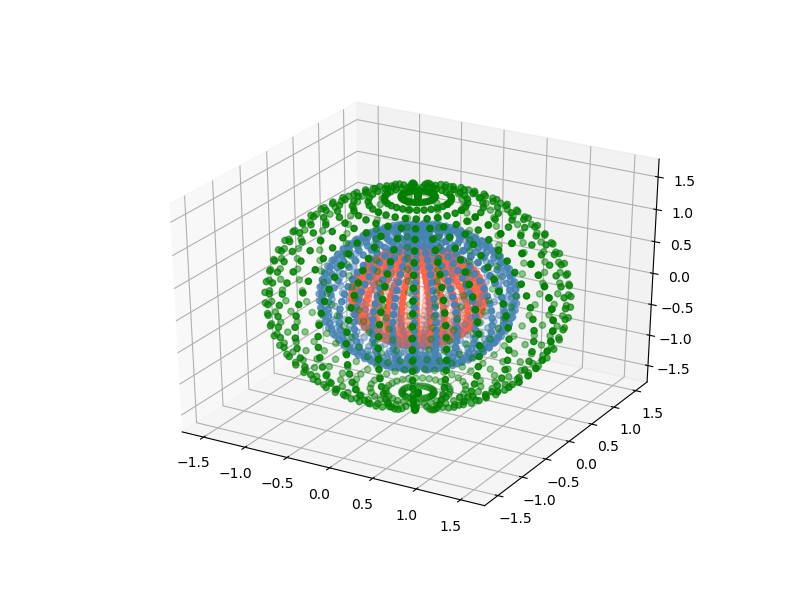

In [378]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')

for j in range(3):
    ax.scatter(r_fin[j,0],r_fin[j,1],r_fin[j,2],c=cs[j])

In [333]:
np.amin(np.linalg.norm(r_fin[1],axis=0))

1.9417559840820604

In [334]:
np.amax(np.linalg.norm(r_fin[0],axis=0))

1.9038859068185567

In [335]:
np.amax(np.linalg.norm(r_fin[2],axis=0))

1.9620410602408758

<IPython.core.display.Javascript object>


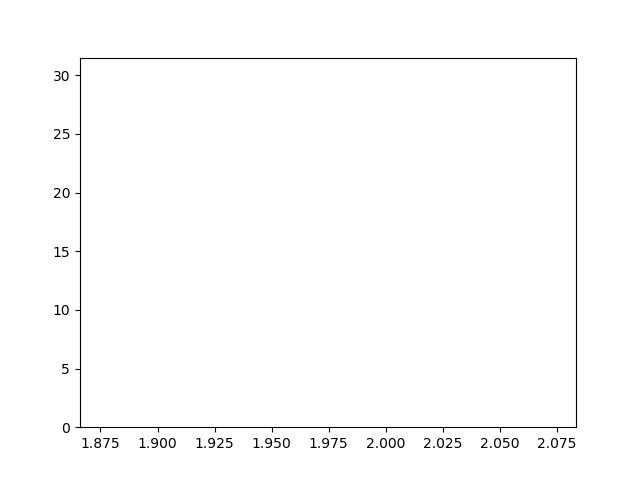

([array([ 0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 29.,  0.,  1.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0., 29.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 30.,  0.,  0.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0., 28.,  0.,  1.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  6.]),
  array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,  8.]),
  array([ 0.,  0.,  4.,  0.,  0.,  0.,  0., 25.,  0.,  1.]),
  array([ 0.,  0.,  2.,  0.,  0.,  0.,  0., 26.,  0.,  2.]),
  array([ 0.,  0.,  3.,  0.,  0.,  0.,  0., 19.,  0.,  8.]),
  array([ 0.,  0.,  5.,  0.,  0.,  0.,  0., 22.,  0.,  3.]),
  array([ 0.,  0.,  1.,  0.,  0.,  0.,  0., 25.,  0.,  4.]),
  array([ 0.,  0.,  5.,  0.,  0.,  0.,  0., 23.,  0.,  2.]),
  array([ 0.,  0.,  7., 

In [202]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(np.linalg.norm(r_fin[1],axis=0))

In [336]:
np.linalg.norm(r_fin[0],axis=0).std()

2.1591546544485764e-16

In [337]:
np.linalg.norm(r_fin[1],axis=0).std()

2.6021253050433636e-16

In [338]:
np.linalg.norm(r_fin[2],axis=0).std()

6.424814589218554e-16

In [356]:
r_fin = r_fin.reshape((3,3,30,30))
r_init = r_init.reshape((3,3,30,30))

In [357]:
r_fin[0,:,0,0]

array([0.        , 0.        , 1.90388591])

In [358]:
r_init[0,:,0,0]

array([0. , 0. , 0.9])

In [359]:
phi_ind = 10
theta_ind = 10

In [379]:
print('Forhold mellom radielle differanser:')
print('\tInnover: {}'.format(np.linalg.norm(r_fin[1,:,phi_ind,theta_ind]-r_fin[0,:,phi_ind,theta_ind])/np.linalg.norm(r_init[1,:,phi_ind,theta_ind]-r_init[0,:,phi_ind,theta_ind])))
print('\tUtover: {}'.format(np.linalg.norm(r_fin[1,:,phi_ind,theta_ind]-r_fin[2,:,phi_ind,theta_ind])/np.linalg.norm(r_init[1,:,phi_ind,theta_ind]-r_init[2,:,phi_ind,theta_ind])))
print('Forhold mellom asimutale differanser:')
print('\tDen ene veien: {}'.format(np.linalg.norm(r_fin[1,:,phi_ind,theta_ind]-r_fin[1,:,phi_ind-1,theta_ind])/np.linalg.norm(r_init[1,:,phi_ind,theta_ind]-r_init[1,:,phi_ind-1,theta_ind])))
print('\tDen andre veien: {}'.format(np.linalg.norm(r_fin[1,:,phi_ind,theta_ind]-r_fin[1,:,phi_ind+1,theta_ind])/np.linalg.norm(r_init[1,:,phi_ind,theta_ind]-r_init[1,:,phi_ind+1,theta_ind])))
print('Forhold mellom polare differanser:')
print('\tDen ene veien: {}'.format(np.linalg.norm(r_fin[1,:,phi_ind,theta_ind]-r_fin[1,:,phi_ind,theta_ind-1])/np.linalg.norm(r_init[1,:,phi_ind,theta_ind]-r_init[1,:,phi_ind,theta_ind-1])))
print('\tDen andre veien: {}'.format(np.linalg.norm(r_fin[1,:,phi_ind,theta_ind]-r_fin[1,:,phi_ind,theta_ind+1])/np.linalg.norm(r_init[1,:,phi_ind,theta_ind]-r_init[1,:,phi_ind,theta_ind+1])))

Forhold mellom radielle differanser:
	Innover: 3.2383005655133505
	Utover: 5.472960631732512
Forhold mellom asimutale differanser:
	Den ene veien: 1.0
	Den andre veien: 1.0
Forhold mellom polare differanser:
	Den ene veien: 1.0
	Den andre veien: 1.0


In [215]:
np.linalg.norm(r_init[1]-r_fin[1],axis=0).min()

0.9746666351020308

In [428]:
_x = np.linspace(0,2,100)
_v = np.linalg.norm(velfield(0,np.vstack((_x,_x,_x))),axis=0)
_v *= np.sign(velfield(0,np.repeat(_x[...,np.newaxis],3,axis=1).T)[0])#_v[_x<1/np.sqrt(3)] *= -1
#_v[np.logical_and(_x > 2/np.sqrt(3),_x < 3/np.sqrt(3))]*=-1
#_v *= np.sign(np.linalg.norm(np.vstack((_x,_x,_x)),axis=0)-1)

<IPython.core.display.Javascript object>


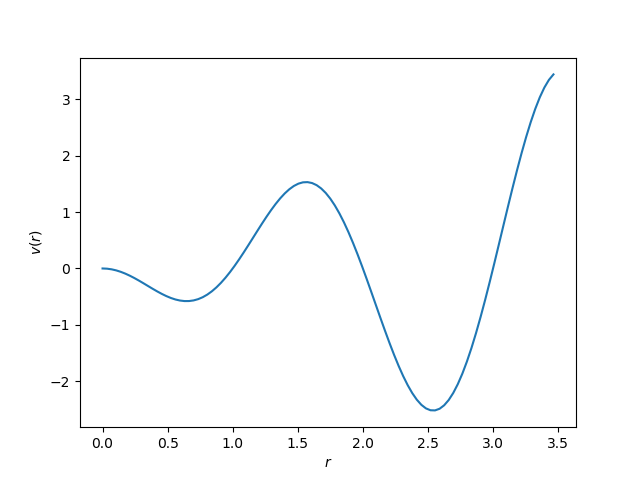

Text(0,0.5,'$v(r)$')

In [430]:
plt.figure()
plt.plot(np.linalg.norm(np.vstack((_x,_x,_x)),axis=0),_v)
plt.xlabel(r'$r$')
plt.ylabel(r'$v(r)$')

In [237]:
_x.s

(100,)

In [261]:
velfield(0,np.ones(3)/np.sqrt(3)-0.01)

0.9826794919243114
0.9826794919243114
0.9826794919243114


array([-0.03085655, -0.03085655, -0.03085655])

In [247]:
1/np.sqrt(3)

0.5773502691896258

In [266]:
pos_i = np.ones(3)/np.sqrt(3)+0.01

In [267]:
foo, pos_f, bar = rk4(0,pos_i,0.1,velfield)

1.0173205080756889
1.0173205080756889
1.0173205080756889
1.0200869653481666
1.0200869653481666
1.0200869653481666
1.0205370048672802
1.0205370048672802
1.0205370048672802
1.0239003337620458
1.0239003337620458
1.0239003337620458


In [268]:
pos_f

array([0.59112607, 0.59112607, 0.59112607])

In [269]:
pos_i

array([0.58735027, 0.58735027, 0.58735027])

In [273]:
pos_i = r_init[1].copy()

In [276]:
t = t0
pos_f = np.copy(pos_i)
for j in range(int(np.ceil((tf-t0)/h))):
    t,pos_f,h = rk4(t,pos_f,h,velfield)

In [283]:
np.linalg.norm(pos_f-pos_i,axis=0).min()

0.0

In [287]:
pos_i.reshape(3,30,30)[:,10,10]-pos_i.reshape(3,30,30)[:,11,10]

array([0.14561023, 0.12368244, 0.        ])

In [288]:
pos_f.reshape(3,30,30)[:,10,10]-pos_f.reshape(3,30,30)[:,11,10]

array([0.14561023, 0.12368244, 0.        ])